## 01 Import Libararies and Data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path= r'C:\Users\Bilel\Desktop\data_analyst_Carrer Foundry\Data Immersion\A6-Advanced Analytics & Dashboard Design\20-01-24 NY Citi Bike project'


In [4]:
# import  datset
df=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','citi_derived.csv'),index_col = False)

In [5]:
df.shape

(49977, 23)

In [6]:
df.head()

,Unnamed: 0,trip_id,bike_id,day_of_week,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,...,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,trip_duration_minutes,age,Trip Range,age_category
0,0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,...,40.742388,-73.997262,993,Subscriber,1968,Female,16,45,long trip,Middle Age
1,1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,...,40.728419,-73.987140,581,Subscriber,1983,Male,9,30,average trip,Adult
2,2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,...,40.768254,-73.988639,361,Subscriber,1989,Male,6,24,average trip,Young Adult
3,3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,...,40.756014,-73.967416,561,Subscriber,1988,Female,9,25,average trip,Young Adult
4,4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,...,40.743943,-73.979661,2296,Non-Subscriber,1978,unknown,38,35,long trip,Adult


## 02 Preparing data for k-means clustering

In [7]:
df.columns

Index(['Unnamed: 0', 'trip_id', 'bike_id', 'day_of_week', 'start_hour',
       'start_time', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_time',
       'end_station_id', 'end_station_name', 'end_station_latitude',
       'end_station_longitude', 'trip_duration', 'subscriber', 'birth_year',
       'gender', 'trip_duration_minutes', 'age', 'Trip Range', 'age_category'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49977 entries, 0 to 49976
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               49977 non-null  int64  
 1   trip_id                  49977 non-null  object 
 2   bike_id                  49977 non-null  int64  
 3   day_of_week              49977 non-null  object 
 4   start_hour               49977 non-null  int64  
 5   start_time               49977 non-null  object 
 6   start_station_id         49977 non-null  int64  
 7   start_station_name       49977 non-null  object 
 8   start_station_latitude   49977 non-null  float64
 9   start_station_longitude  49977 non-null  float64
 10  end_time                 49977 non-null  object 
 11  end_station_id           49977 non-null  int64  
 12  end_station_name         49977 non-null  object 
 13  end_station_latitude     49977 non-null  float64
 14  end_station_longitude 

In [9]:
columns_to_drop = ['Unnamed: 0','trip_id', 'bike_id', 'day_of_week', 'start_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_time', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'trip_duration', 'subscriber', 'birth_year', 'gender', 'Trip Range','age_category']

In [10]:
data=df.drop(columns=columns_to_drop)

In [11]:
data.head()

,start_hour,trip_duration_minutes,age
0,18,16,45
1,18,9,30
2,19,6,24
3,11,9,25
4,18,38,35


### Data Standardization

In [12]:
from sklearn.preprocessing import StandardScaler


In [13]:
# define standard scaler
scaler = StandardScaler()

In [14]:
# transform data
data2 = scaler.fit_transform(data)

## 03 The Elbow Technique

In [15]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [16]:
score = [kmeans[i].fit(data2).score(data2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-149930.99999999983,
 -115031.76303942985,
 -85091.24825376688,
 -61658.82113052119,
 -55658.675393703576,
 -49008.947244045885,
 -45121.588613557244,
 -41809.53166348518,
 -38055.41414051464]

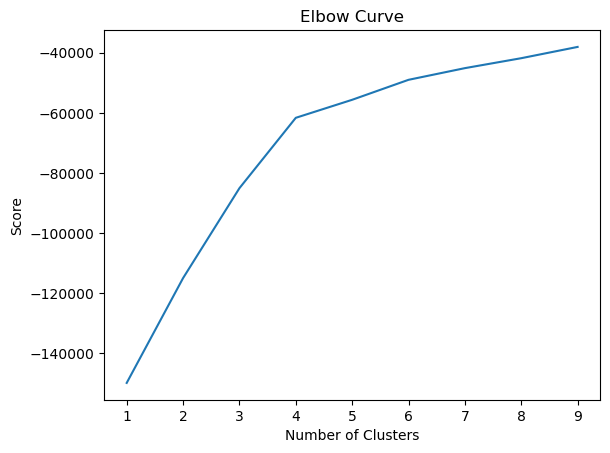

In [17]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

From the chart we can see that the curve jumps rarapidly from 4 to 5 on th x-axis, so the optimal count of clusters is just 4.

## 04 K-means clustering

In [18]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4)

In [19]:
# Fit the k-means object to the data.

kmeans.fit(data2)

KMeans(n_clusters=4)

In [20]:
df['clusters'] = kmeans.fit_predict(data2)


In [21]:
df.head()

,Unnamed: 0,trip_id,bike_id,day_of_week,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,...,end_station_longitude,trip_duration,subscriber,birth_year,gender,trip_duration_minutes,age,Trip Range,age_category,clusters
0,0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,...,-73.997262,993,Subscriber,1968,Female,16,45,long trip,Middle Age,2
1,1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,...,-73.987140,581,Subscriber,1983,Male,9,30,average trip,Adult,0
2,2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,...,-73.988639,361,Subscriber,1989,Male,6,24,average trip,Young Adult,0
3,3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,...,-73.967416,561,Subscriber,1988,Female,9,25,average trip,Young Adult,3
4,4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,...,-73.979661,2296,Non-Subscriber,1978,unknown,38,35,long trip,Adult,1


In [22]:
df['clusters'].value_counts()

clusters
0    18029
3    13538
2    10038
1     8372
Name: count, dtype: int64

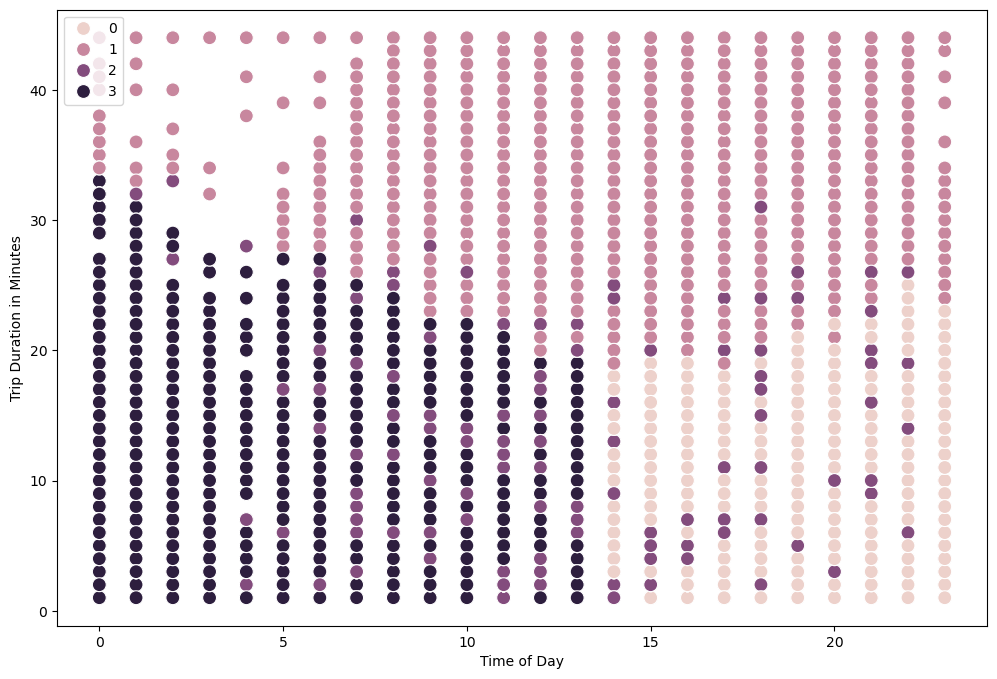

In [23]:
# Plot the clusters for the "Start Hour" and "Trip Minutes" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['start_hour'], y=df['trip_duration_minutes'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Time of Day') # Label x-axis.
plt.ylabel('Trip Duration in Minutes') # Label y-axis.
plt.show()

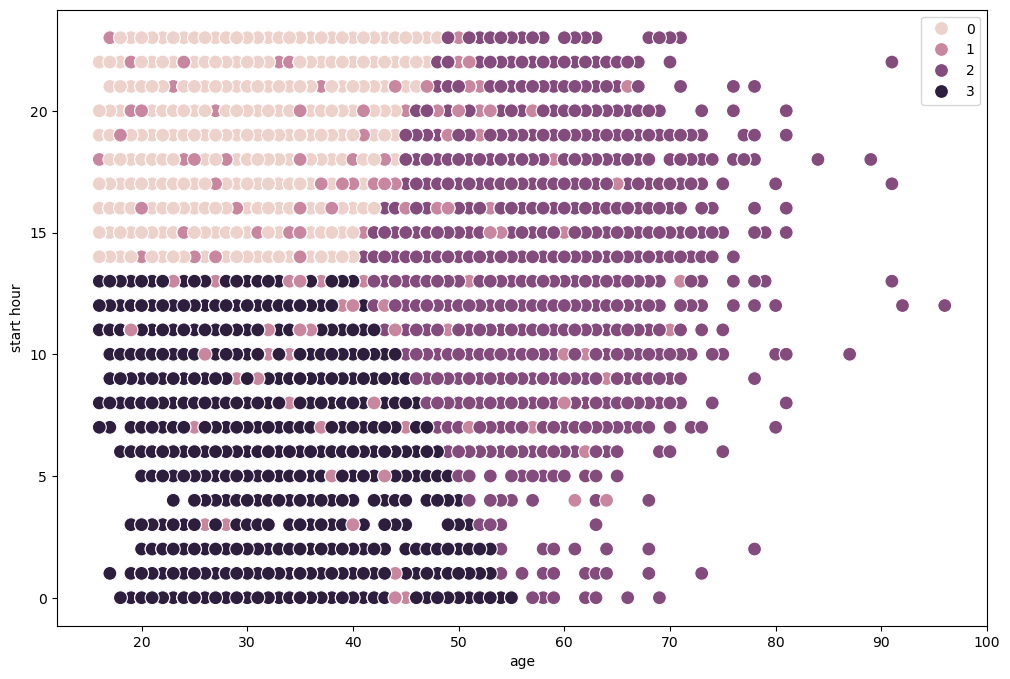

In [24]:
# Plot the clusters for the "Start Hour" and "Age" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['age'], y=df['start_hour'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('age') # Label x-axis.
plt.ylabel('start hour') # Label y-axis.
plt.show()

In [25]:
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'magenta'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'

In [26]:
df.groupby('cluster').agg({'start_hour':['mean', 'median'], 
                         'age':['mean', 'median'], 
                         'trip_duration_minutes':['mean', 'median']})

start_hour               age        trip_duration_minutes       
                  mean median       mean median                  mean median
cluster                                                                     
dark purple   8.850126    9.0  32.807874   33.0              9.906042    9.0
magenta      14.920091   15.0  36.006808   35.0             30.181677   28.0
pink         17.960508   18.0  31.997060   32.0              9.956293    9.0
purple       13.791791   14.0  52.499103   51.0             10.703327    9.0

Cluster Analysis:

Dark Purple:

Average Start Hour: 14.92h (median: 15.0h)

Average Age: 36.01 years (median: 35.0 years)

Average Trip Duration: 30.17 minutes (median: 28.0 minutes)

Users in this cluster are slightly older and prefer to use bikes in the afternoon.

Magenta:

Average Start Hour: 17.96h (median: 18.0h)

Average Age: 32.00 years (median: 32.0 years)

Average Trip Duration: 9.95 minutes (median: 9.0 minutes)

This group uses bikes primarily in the late afternoon for shorter trips.

Pink:

Average Start Hour: 13.79h (median: 14.0h)

Average Age: 52.50 years (median: 51.0 years)

Average Trip Duration: 10.71 minutes (median: 9.0 minutes)

Users in this cluster are the oldest and use bikes mainly in the early afternoon for short trips.

Purple:

Average Start Hour: 8.85h (median: 9.0h)

Average Age: 32.80 years (median: 33.0 years)

Average Trip Duration: 9.90 minutes (median: 9.0 minutes)

This group prefers to use bikes in the morning for relatively short trips.

General Observations:
Start Hour:

Users in the "Purple" cluster start their trips the earliest in the day (8.85h).

The "Magenta" cluster has the latest average start hour (17.96h).

Age:

The "Pink" cluster has the highest average age (52.50 years), while the "Magenta" cluster has a younger average age (32.00 years).

Trip Duration:

Users in the "Dark Purple" cluster have the longest average trip duration (30.17 minutes).

The shortest trips are made by users in the "Magenta," "Pink," and "Purple" clusters, with average durations around 9-10 minutes.



In [27]:
# export 
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'citi_clusters.csv'))